# Rf 4 0 5_Realtocatfuncs

Data and categories: demonstration of real-discrete mapping functions




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:53 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Define pdf in x, sample dataset in x
------------------------------------------------------------------------

Define a dummy PDF in x

In [2]:
x = ROOT.RooRealVar("x", "x", 0, 10)
a = ROOT.RooArgusBG("a", "argus(x)", x, ROOT.RooFit.RooConst(
    10), ROOT.RooFit.RooConst(-1))


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Generate a dummy dataset

In [3]:
data = a.generate(ROOT.RooArgSet(x), 10000)

Create a threshold real -> cat function
--------------------------------------------------------------------------

A RooThresholdCategory is a category function that maps regions in a real-valued
input observable observables to state names. At construction time a 'default'
state name must be specified to which all values of x are mapped that are not
otherwise assigned

In [4]:
xRegion = ROOT.RooThresholdCategory(
    "xRegion", "region of x", x, "Background")

Specify thresholds and state assignments one-by-one.
Each statement specifies that all values _below_ the given value
(and above any lower specified threshold) are mapped to the
category state with the given name

Background | SideBand | Signal | SideBand | Background
          4.23       5.23     8.23       9.23

In [5]:
xRegion.addThreshold(4.23, "Background")
xRegion.addThreshold(5.23, "SideBand")
xRegion.addThreshold(8.23, "Signal")
xRegion.addThreshold(9.23, "SideBand")

False

Use threshold function to plot data regions
----------------------------------------------

Add values of threshold function to dataset so that it can be used as
observable

In [6]:
data.addColumn(xRegion)

<ROOT.RooCategory object ("xRegion") at 0x5561e1dd70f0>

Make plot of data in x

In [7]:
xframe = x.frame(ROOT.RooFit.Title(
    "Demo of threshold and binning mapping functions"))
data.plotOn(xframe)

<ROOT.RooPlot object ("frame_x_5561e1e14aa0") at 0x5561e1e14aa0>

Use calculated category to select sideband data

In [8]:
data.plotOn(
    xframe,
    ROOT.RooFit.Cut("xRegion==xRegion::SideBand"),
    ROOT.RooFit.MarkerColor(
        ROOT.kRed),
    ROOT.RooFit.LineColor(
        ROOT.kRed))

<ROOT.RooPlot object ("frame_x_5561e1e14aa0") at 0x5561e1e14aa0>

[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 2748 events out of 10000 total events


Create a binning real -> cat function
----------------------------------------------------------------------

A RooBinningCategory is a category function that maps bins of a (named) binning definition
in a real-valued input observable observables to state names. The state names are automatically
constructed from the variable name, binning name and the bin number. If no binning name
is specified the default binning is mapped

In [9]:
x.setBins(10, "coarse")
xBins = ROOT.RooBinningCategory("xBins", "coarse bins in x", x, "coarse")

Use binning function for tabulation and plotting
-----------------------------------------------------------------------------------------------

Print table of xBins state multiplicity. Note that xBins does not need to be an observable in data
it can be a function of observables in data as well

In [10]:
xbtable = data.table(xBins)
xbtable.Print("v")


  Table xBins : aData
  +---------------+------+
  | x_coarse_bin0 |  105 |
  | x_coarse_bin1 |  329 |
  | x_coarse_bin2 |  499 |
  | x_coarse_bin3 |  739 |
  | x_coarse_bin4 |  934 |
  | x_coarse_bin5 | 1218 |
  | x_coarse_bin6 | 1450 |
  | x_coarse_bin7 | 1675 |
  | x_coarse_bin8 | 1767 |
  | x_coarse_bin9 | 1284 |
  +---------------+------+



Add values of xBins function to dataset so that it can be used as
observable

In [11]:
xb = data.addColumn(xBins)

Define range "alt" as including bins 1,3,5,7,9

In [12]:
xb.setRange(
    "alt",
    "x_coarse_bin1,x_coarse_bin3,x_coarse_bin5,x_coarse_bin7,x_coarse_bin9")

Construct subset of data matching range "alt" but only for the first
5000 events and plot it on the frame

In [13]:
dataSel = data.reduce(ROOT.RooFit.CutRange(
    "alt"), ROOT.RooFit.EventRange(0, 5000))
dataSel.plotOn(xframe, ROOT.RooFit.MarkerColor(ROOT.kGreen),
               ROOT.RooFit.LineColor(ROOT.kGreen))

c = ROOT.TCanvas("rf405_realtocatfuncs", "rf405_realtocatfuncs", 600, 600)
xframe.SetMinimum(0.01)
ROOT.gPad.SetLeftMargin(0.15)
xframe.GetYaxis().SetTitleOffset(1.4)
xframe.Draw()

c.SaveAs("rf405_realtocatfuncs.png")

[#1] INFO:Plotting -- RooPlot::updateFitRangeNorm: New event count of 2627 will supercede previous event count of 10000 for normalization of PDF projections


Info in <TCanvas::Print>: png file rf405_realtocatfuncs.png has been created


Draw all canvases 

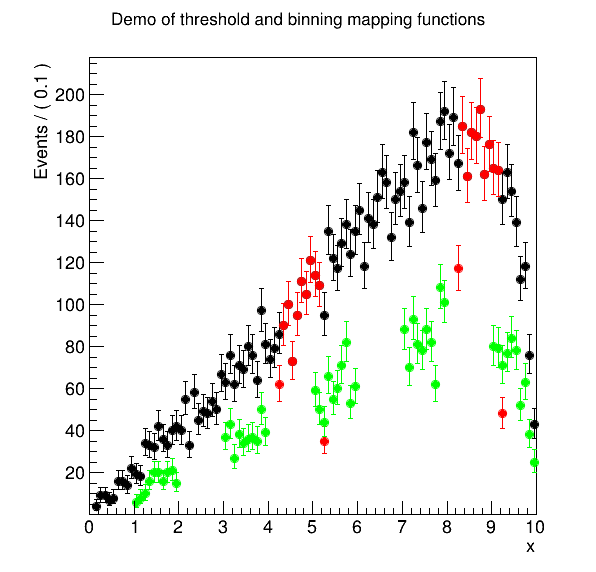

In [14]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()